In [1]:
# Time series forecasting: Creating Time Series Forecast using Python
#Reference: https://trainings.analyticsvidhya.com/courses/course-v1:AnalyticsVidhya+TS_101+TS_term1/course/#block-v1:AnalyticsVidhya+TS_101+TS_term1+type@chapter+block@a869013c2e274d1c82cd2fc50e64fb2d
#Problem: https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/
#Forecast traffic data for next 7 months given data for 25 months
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
Sample_submission=pd.read_csv("Sample_Submission.csv")

In [3]:
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
# create a copy of original data set
training_original=training_data.copy()
test_original=test_data.copy()

In [5]:
# Dataset details
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


In [7]:
test_data.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [8]:
training_data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [9]:
# Need to convert the Datetime data from object to datetime
training_data['datetime']=pd.to_datetime(training_data.Datetime,format='%d-%m-%Y %H:%M')
test_data['datetime']=pd.to_datetime(test_data.Datetime,format='%d-%m-%Y %H:%M')
test_original['datetime']=pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
training_original['datetime']=pd.to_datetime(training_original.Datetime,format='%d-%m-%Y %H:%M')
for i in (training_data, test_data,test_original,training_original):
    i['Year']=i.datetime.dt.year
    i['Month']=i.datetime.dt.month
    i['Day']=i.datetime.dt.day
    i['Hour']=i.datetime.dt.hour

In [10]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 8 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
datetime    18288 non-null datetime64[ns]
Year        18288 non-null int64
Month       18288 non-null int64
Day         18288 non-null int64
Hour        18288 non-null int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 1.1+ MB


In [11]:
# Hypothesis says weekdays has more traffic than weekend
# create variable for day of the week to check into it
training_data['day of week']=training_data.datetime.dt.dayofweek
training_data['day of week'].unique()
# 5, 6 is weekend else a weekday

array([5, 6, 0, 1, 2, 3, 4], dtype=int64)

In [12]:
def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0
training_data['weekend']=training_data['datetime'].apply(applyer)
training_data.head()

,ID,Datetime,Count,datetime,Year,Month,Day,Hour,day of week,weekend
0,0,25-08-2012 00:00,8,2012-08-25 00:00:00,2012,8,25,0,5,1
1,1,25-08-2012 01:00,2,2012-08-25 01:00:00,2012,8,25,1,5,1
2,2,25-08-2012 02:00,6,2012-08-25 02:00:00,2012,8,25,2,5,1
3,3,25-08-2012 03:00,2,2012-08-25 03:00:00,2012,8,25,3,5,1
4,4,25-08-2012 04:00,2,2012-08-25 04:00:00,2012,8,25,4,5,1


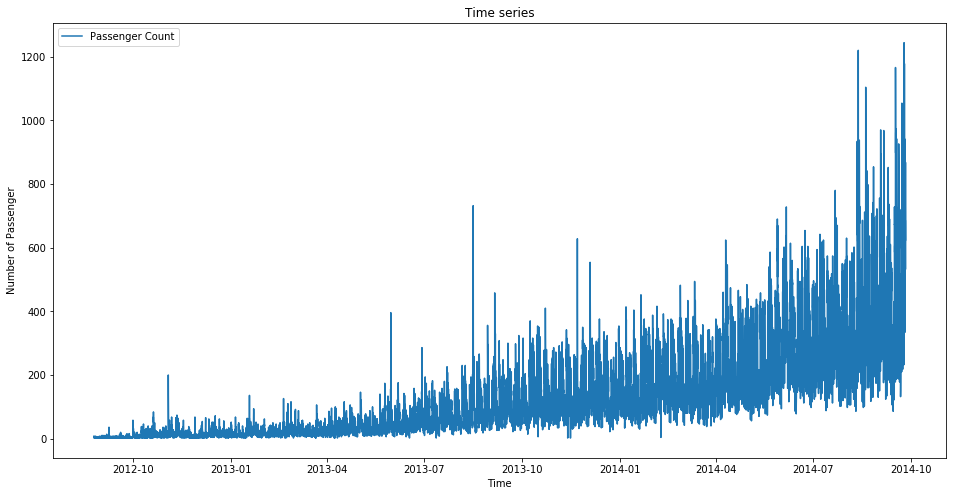

In [13]:
# Next look at the Time series to look at long time trend
training_data.index=training_data['datetime']
plot_train=training_data.drop('ID',axis=1)
time_series=plot_train['Count']
plt.figure(figsize=(16,8))
plt.plot(time_series, label='Passenger Count')
plt.title('Time series')
plt.xlabel('Time')
plt.ylabel('Number of Passenger')
plt.legend(loc='best')

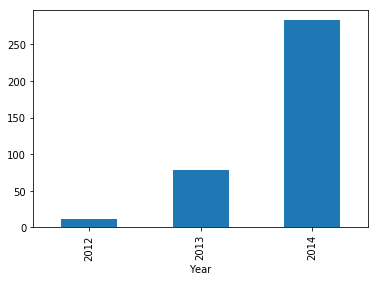

In [14]:
# Exploratory analysis begin
training_data.groupby('Year')['Count'].mean().plot.bar()

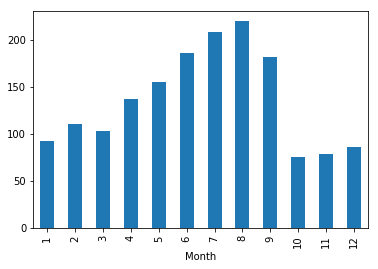

In [15]:
training_data.groupby('Month')['Count'].mean().plot.bar()

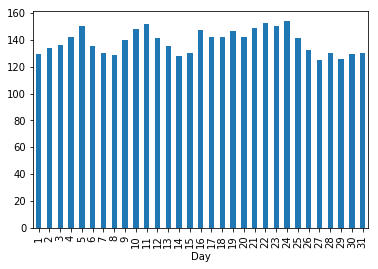

In [16]:
training_data.groupby('Day')['Count'].mean().plot.bar()

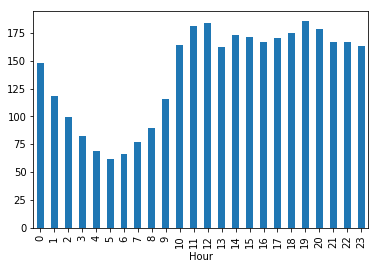

In [17]:
training_data.groupby('Hour')['Count'].mean().plot.bar()

In [18]:
training_data.groupby('Hour')['Count'].mean()

Hour
0     147.695538
1     117.868766
2      99.753281
3      82.422572
4      69.375328
5      62.102362
6      66.776903
7      77.443570
8      89.181102
9     115.241470
10    163.572178
11    181.341207
12    183.262467
13    162.081365
14    173.304462
15    171.115486
16    166.748031
17    170.632546
18    174.832021
19    185.514436
20    178.272966
21    166.398950
22    167.002625
23    163.055118
Name: Count, dtype: float64

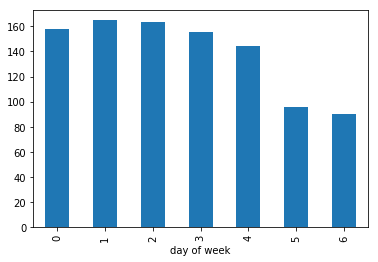

In [19]:
training_data.groupby('day of week')['Count'].mean().plot.bar()

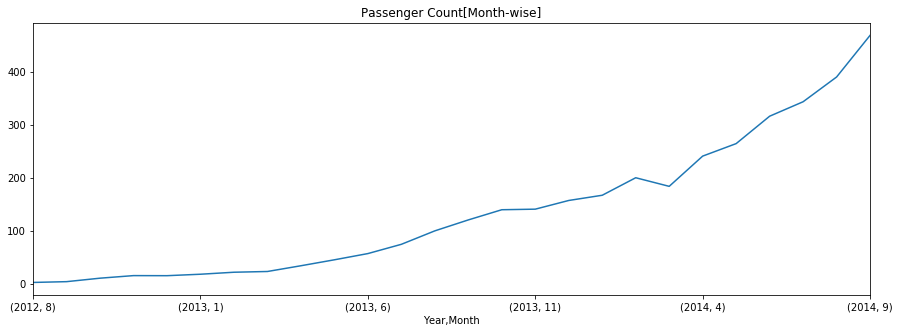

In [20]:
temp=training_data.groupby(['Year','Month'])['Count'].mean()
temp.plot(figsize=(15,5),title='Passenger Count[Month-wise]')

In [21]:
training_data=training_data.drop('ID',axis=1)

In [22]:
hourly=training_data.resample('H').mean()
daily=training_data.resample('D').mean()
weekly=training_data.resample('W').mean()
monthly=training_data.resample('M').mean()

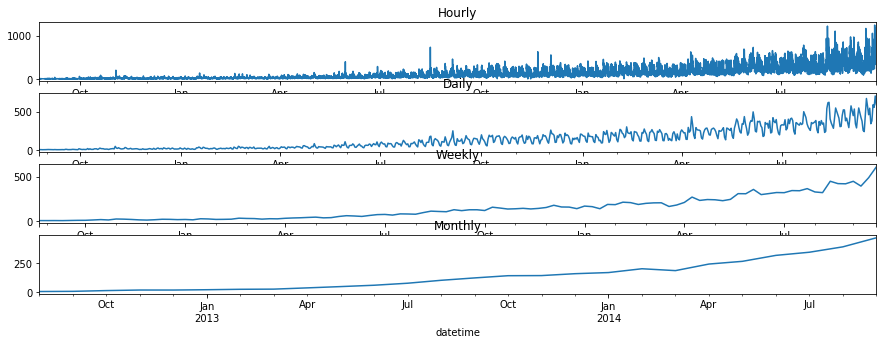

In [23]:
fig, axs =plt.subplots(4,1)
hourly.Count.plot(figsize=(15,5),title='Hourly',ax=axs[0])
daily.Count.plot(figsize=(15,5),title='Daily',ax=axs[1])
weekly.Count.plot(figsize=(15,5),title='Weekly',ax=axs[2])
monthly.Count.plot(figsize=(15,5),title='Monthly',ax=axs[3])
plt.show()

In [24]:
# working with daily time series
test_data.index=test_data['datetime']
test_data=test_data.resample('D').mean()

training_data=training_data.resample('D').mean()


In [25]:
# Splitting data into training and validation sets
training_data.index[0],training_data.index[-1]
# Making a 80:20 split based on date
train=training_data.ix['2012-08-25':'2014-06-24']
valid=training_data.ix['2014-06-25':'2014-09-25']

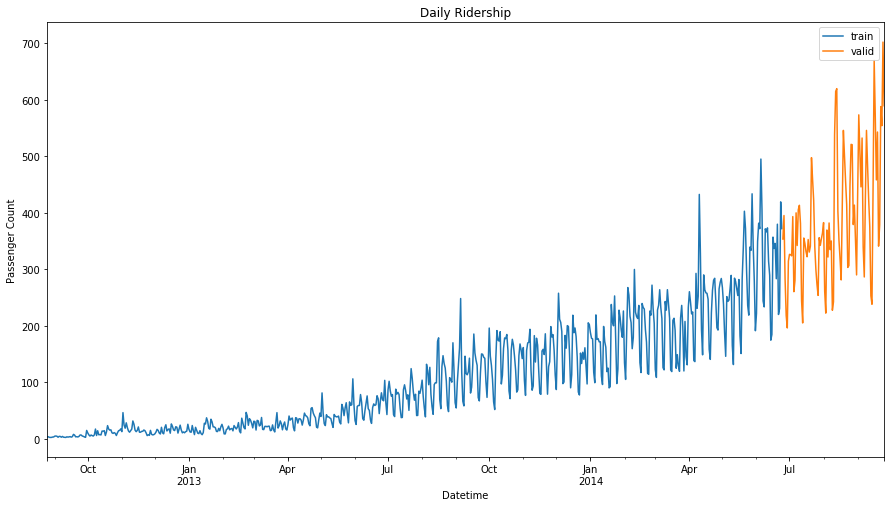

In [26]:
train.Count.plot(figsize=(15,8),title='Daily Ridership',label='train')
valid.Count.plot(figsize=(15,8),title='Daily Ridership',label='valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(loc='best')
plt.show()

In [27]:
#Modeling Method 2 : Simple Exponential Smoothing
from statsmodels.tsa.api import SimpleExpSmoothing

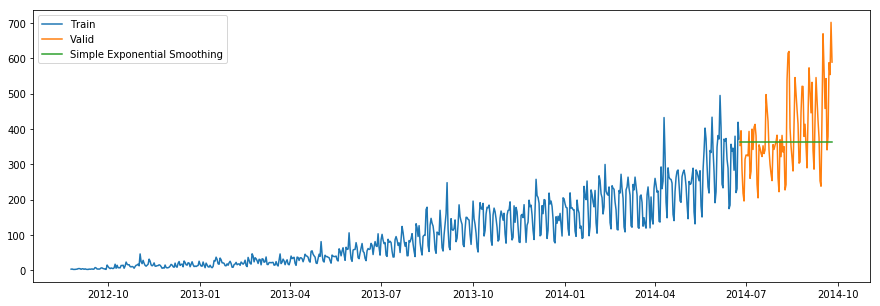

In [28]:
dd=np.asarray(train['Count'])
y_hat=valid.copy()
fit=SimpleExpSmoothing(dd).fit(smoothing_level=0.6,optimized=False)
y_hat['SimpleExp']=fit.forecast(len(valid))
plt.figure(figsize=(15,5))
plt.plot(train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat['SimpleExp'],label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show()

In [29]:
rms=sqrt(mean_squared_error(valid.Count,y_hat.SimpleExp))
rms

113.43708111884514

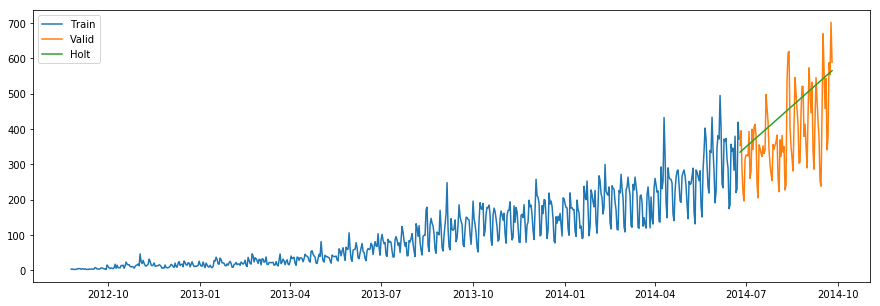

In [30]:
#Method 3: Holt’s Linear Trend Model
from statsmodels.tsa.api import Holt
fit1=Holt(dd).fit(smoothing_level=0.3,smoothing_slope=0.1)
y_hat['Holt']=fit1.forecast(len(valid))
plt.figure(figsize=(15,5))
plt.plot(train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat['Holt'],label='Holt')
plt.legend(loc='best')
plt.show()

In [31]:
rms=sqrt(mean_squared_error(valid.Count,y_hat.Holt))
rms

112.94278345314041

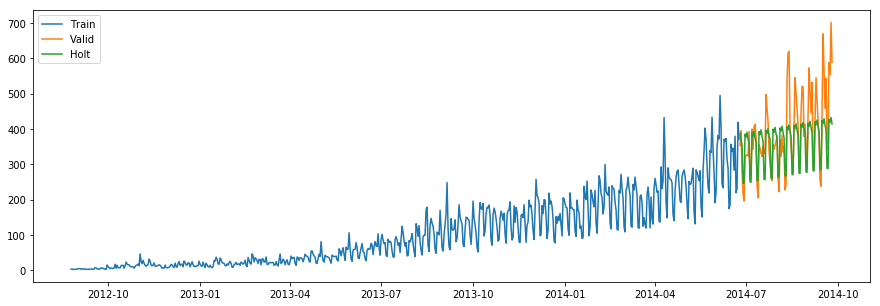

In [32]:
#Method 3: Holt's winter model
from statsmodels.tsa.api import ExponentialSmoothing
fit2=ExponentialSmoothing(dd,seasonal_periods=7,trend='add',seasonal='add').fit()
y_hat['HoltWinter']=fit2.forecast(len(valid))
plt.figure(figsize=(15,5))
plt.plot(train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat['HoltWinter'],label='Holt')
plt.legend(loc='best')
plt.show()

In [33]:
rms=sqrt(mean_squared_error(valid.Count,y_hat.HoltWinter))
rms

82.37467736825413

In [34]:
# Combine both trend and seasonality in making predictions
# ARIMA model: Auto Regression Integrated Moving Average
#Step 1: check whether time-series is stationary or not: Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(train['Count'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lag Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] =value
print(dfoutput)

Test Statistic                   1.387308
p-value                          0.997056
#Lag Used                       20.000000
Number of Observations Used    648.000000
Critical value (1%)             -3.440482
Critical value (5%)             -2.866011
Critical value (10%)            -2.569151
dtype: float64


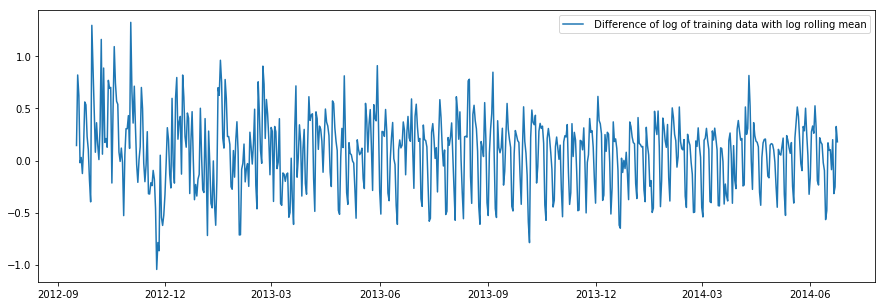

In [35]:
#Removing trend
train_log=np.log(train['Count'])
valid_log=np.log(valid['Count'])
moving_log=pd.rolling_mean(train_log,window=24)
train_log_moving_diff=train_log-moving_log
train_log_moving_diff.dropna(inplace=True)
plt.figure(figsize=(15,5))
plt.plot(train_log_moving_diff,label=' Difference of log of training data with log rolling mean')
plt.legend(loc='best')
plt.show()

In [36]:
dftest=adfuller(train_log_moving_diff,autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lag Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] =value
print(dfoutput)

Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lag Used                      2.000000e+01
Number of Observations Used    6.250000e+02
Critical value (1%)           -3.440856e+00
Critical value (5%)           -2.866175e+00
Critical value (10%)          -2.569239e+00
dtype: float64


In [37]:
# After removing trend we need to stablise the mean
train_log_diff=train_log-train_log.shift(1)
train_log_diff.dropna(inplace=True)
dftest=adfuller(train_log_diff,autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lag Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] =value
print(dfoutput)

Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lag Used                      1.900000e+01
Number of Observations Used    6.480000e+02
Critical value (1%)           -3.440482e+00
Critical value (5%)           -2.866011e+00
Critical value (10%)          -2.569151e+00
dtype: float64


In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [39]:
decomposition=seasonal_decompose(pd.DataFrame(train_log).Count.values,freq=24)

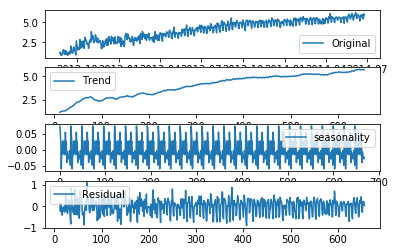

In [40]:
plt.subplot(411)
plt.plot(train_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal,label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid,label='Residual')
plt.legend(loc='best')

In [41]:
train_log_decompose=pd.DataFrame(decomposition.resid)
train_log_decompose['date']=train_log.index
train_log_decompose.set_index('date',inplace=True)
train_log_decompose.dropna(inplace=True)

In [42]:
dftest=adfuller(train_log_decompose[0],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lag Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] =value
print(dfoutput)

Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lag Used                      2.000000e+01
Number of Observations Used    6.240000e+02
Critical value (1%)           -3.440873e+00
Critical value (5%)           -2.866183e+00
Critical value (10%)          -2.569243e+00
dtype: float64


In [43]:
# Since the lowest test statistic is for train_log_diff we would use that data for ARIMA model fitting
# Auto correlation function anf partial auto correlation function
from statsmodels.tsa.stattools import acf, pacf
lag_acf=acf(train_log_diff.dropna(),nlags=25)
lag_pacf=pacf(train_log_diff.dropna(),nlags=25,method='ols')

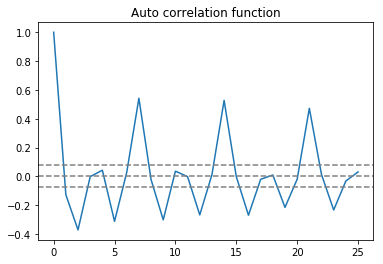

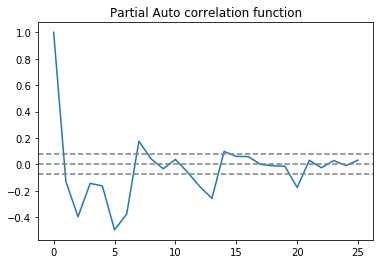

In [44]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Auto correlation function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Auto correlation function')
plt.show()

In [45]:
# p value is when partial auto correlation function crosses upper confidence interval for the first time-> p=1
# q value is when auto correlation function crosses upper confidence interval for the first time-> q=1
from statsmodels.tsa.arima_model import ARIMA

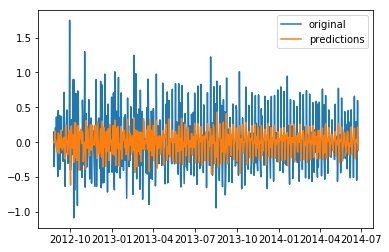

In [46]:
# AR Model Auto-regressive model, linearly dependent on last value, q set to 0
model=ARIMA(train_log,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(train_log_diff.dropna(),label='original')
plt.plot(results_AR.fittedvalues,label='predictions')
plt.legend(loc='best')
plt.show()

In [47]:
AR_predict=results_AR.predict(start="2014-06-25",end="2014-09-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0],index=valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict=np.exp(AR_predict1)

In [48]:
rms=sqrt(np.dot(valid.Count,AR_predict))/valid.shape[0]
rms

43.97400023779235

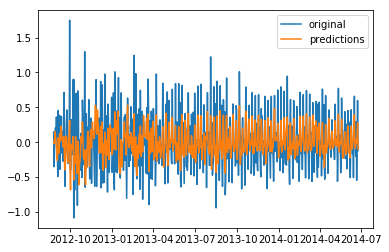

In [49]:
#MA Model Moving-average model, value depend on the current and past values of a stochastic term
model=ARIMA(train_log,order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(train_log_diff.dropna(),label='original')
plt.plot(results_MA.fittedvalues,label='predictions')
plt.legend(loc='best')
plt.show()

In [50]:
MA_predict=results_MA.predict(start="2014-06-25",end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0],index=valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict=np.exp(MA_predict1)

In [51]:
rms=sqrt(np.dot(valid.Count,MA_predict))/valid.shape[0]
rms

43.26967067134726

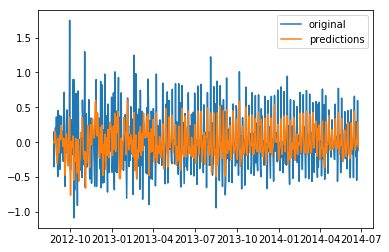

In [52]:
# Combining both AR and MA to get ARIMA model
model=ARIMA(train_log,order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(train_log_diff.dropna(),label='original')
plt.plot(results_ARIMA.fittedvalues,label='predictions')
plt.legend(loc='best')
plt.show()

In [53]:
ARIMA_predict=results_ARIMA.predict(start="2014-06-25",end="2014-09-25")
ARIMA_predict=ARIMA_predict.cumsum().shift().fillna(0)
ARIMA_predict1=pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0],index=valid.index)
ARIMA_predict1=ARIMA_predict1.add(ARIMA_predict,fill_value=0)
ARIMA_predict=np.exp(ARIMA_predict1)

In [54]:
rms=sqrt(np.dot(valid.Count,ARIMA_predict))/valid.shape[0]
rms

42.89972098684073

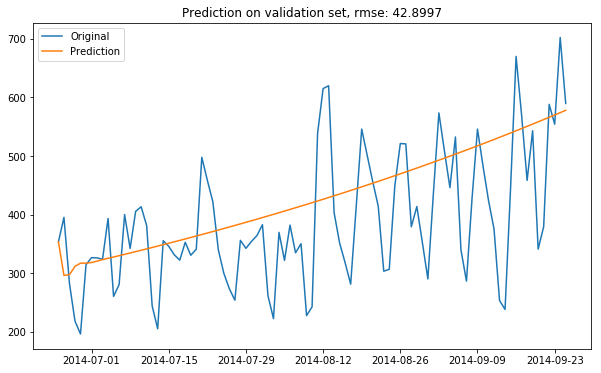

In [55]:
#The best rms score on validation set is from ARIMA model 
plt.figure(figsize=(10,6))
plt.plot(valid['Count'],label="Original")
plt.plot(ARIMA_predict,label="Prediction")
plt.legend(loc="best")
plt.title("Prediction on validation set, rmse: %.4f" % rms)
plt.show()

In [56]:
# Next we try the SARIMAX Model ; it takes seasonality into account as well
from statsmodels.tsa.api import SARIMAX

In [57]:
fit1=SARIMAX(train.Count,order=(2,1,4),seasonal_order=(0,1,1,7)).fit()
y_hat['SARIMAX']=fit1.predict(start="2014-06-25",end="2014-09-25",dynamic=True)
rms=sqrt(np.dot(valid.Count,y_hat.SARIMAX))/valid.shape[0]
rms

40.65468426508707

In [58]:
# The SARIMAX gives the best score on validalition data set so we take this model to make prediction on test data set
print(test_data.index[0],test_data.index[-1])
test_data['prediction']=fit1.predict(start="2014-09-26",end="2015-04-26",dynamic=True)
test_data.head()

2014-09-26 00:00:00 2015-04-26 00:00:00


,ID,Year,Month,Day,Hour,prediction
datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,452.855972
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,344.262072
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.044965
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,479.500962
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,473.553151


In [59]:
#These are daily predictions now comnvert them to hourly prediction by taking ratio of hourly data from training data
#setting the test data in same ratio
training_original['ratio']=training_original['Count']/training_original['Count'].sum()
temp=training_original.groupby(['Hour'])['ratio'].sum()
pd.DataFrame(temp,columns=['Hour','ratio']).to_csv('Group_by.csv')
temp2=pd.read_csv("Group_by.csv")
temp2=temp2.drop('Hour.1',axis=1)

In [67]:
merge=pd.merge(test_data,test_original,on=('Day','Month','Year'),how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['Year','Month','Day','Hour_x','Hour_y','Datetime'],axis=1)
prediction=pd.merge(merge,temp2,on='Hour',how='left')
prediction['Count']=prediction['ratio']*prediction['prediction']*24
prediction['ID']=prediction['ID_y']
prediction=prediction.drop(['ID_x','prediction','ID_y','datetime','Hour','ratio'],axis=1)
prediction

,Count,ID
0,481.330699,18288
1,384.127080,18289
2,325.089824,18290
3,268.610107,18291
4,226.089939,18292
5,202.387789,18293
6,217.621831,18294
7,252.383843,18295
8,290.635742,18296
9,375.564882,18297


In [69]:
pd.DataFrame(prediction,columns=['ID','Count']).to_csv('submission.csv',index=False)

In [ ]:
# Final score on test data set: 216.